# Customer Churn Prediction

# Dataset

Perusahaan "RK telco" merupakan perusahaan multinasional yang berbasis di Prancis dan  bergerak dibidang jasa telekomunikasi, perusahaan ini telah memiliki basis pelanggan yang sangat banyak baik di Prancis maupun di jerman dan spanyol. Perusahaan ingin memperbesar basis pelanggan salah satunya dengan cara perusahaan ingin mengurangi tingkat churn konsumennya dikarenakan biaya untuk mendapatkan pelanggan baru maupun buyback pelanggan sangat tinggi. perusahaan telah memberikan bebeapa data tentang behaviour dan identitas konsumennya agar dapat dilakukan prediksi terhadap potensi churn seorang customer. 


# Businees Understanding

## Role

- Kami merupakan perusahaan jasa di bidang konsultan data telekomunikasi,saat ini perusahaan "RK telco" adalah client kami, dimana kami diminta untuk memprediksi customer yang most likely churn. dimana churn yang dimaksud disi adalah customer yang meninggalkan layanan yang di berikan oleh perusahaan tersebut

## Problem

- Perusahaan ingin mengetahui konsumen seperti apa yang cenderung akan churn, karena perusahaan akan memberikan campaign terhadap pelanggan tersebut agar tidak meninggalkan layanan yang diberikan perusahaan

## Goal

- Memperbesar basis pelanggan deanan mengurangi tingkat churn.

## Objective

- Membuat model yang mampu memprediksi pelanggan yang akan berpotensi churn dengan akurasi diatas 85% dan cvr (presisi) diatas 85%. 
- Mengurangi pelanggan yang churn minimal 50%

## Business Metric


- **Mengurangi Loss Revenue (pendapatan kotor)** : Pendapatan yang dihasilkan dari penjualan jasa.

# Exploratory Data Analysis

# Data Collection

## Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold,SelectKBest,mutual_info_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.mixture import GaussianMixture
import shap
import scikitplot as skplt

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Load Dataset

In [2]:
# read file csv into dataframe
df = pd.read_csv(r"Churn_Modelling.csv",index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# view info attributes and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


Dari info dari kedua data diatas dapat diketahui bahwa:
- Terdapat 13 Kolom pada dataset, terdiri dari 7 kolom numerik dan 6 kolom kategorik
- Jumlah baris data adalah 10000 baris
- Tidak ada missing value

## Data Description

- **CustomerID** : ID unik pelanggan
- **Surname** : Nama Pelanggan
- **CreditScore** : Nilai yang diberikan kepada penggan atas kelayakan pemberian pinjaman
- **Geography** : Negara tempat layanan diberikan 
- **Gender** :Jenis Kelamin
- **Age** : Umur
- **Tenure** : Jangka Waktu (bulan) pelanggan menerima jasa layanan telekomunikasi
- **Balance** : Jumlah sisa saldo
- **NumOfProducts** : Jumlah prduk yang pelanggan miliki
- **HasCrCard** : Kepemilikan Credit card atau tidak (0: Tidak, 1: Ya)
- **IsActiveMember** : Seberapa aktif mereka dalam menggunakan layanan (0: Tidak Aktif, 1: Aktif)
- **EstimatedSalary** : Perkiraan gaji pelanggan
- **Exited** : Apakah pelanggan meninggalkan layanan atau tidak


# Data understanding

## Descriptive Statistic

In [4]:
df.sample(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
6812,15771222,Oguejiofor,779,France,Female,42,5,0.00,2,0,0,25951.91,0
9868,15620936,Warren,787,France,Male,32,4,0.00,2,1,1,13238.93,0
5109,15777772,Whittaker,650,Spain,Male,55,9,119618.42,1,1,1,29861.13,0
6835,15625035,Mills,703,France,Male,50,8,160139.59,2,1,1,79314.10,0
7665,15679622,Clayton,602,France,Male,35,8,0.00,1,1,1,22499.29,0
6642,15591942,Zito,611,Spain,Female,33,7,0.00,2,1,1,3729.89,0
6755,15688085,Warner,627,Spain,Female,28,3,157597.61,1,0,1,34097.22,0
222,15787155,Yang,514,Spain,Male,30,7,0.00,1,0,1,125010.24,0
5525,15654975,Wu,641,France,Female,53,0,123835.52,2,0,1,160110.65,0


- Customerid dan Surname memiliki nilai yang sangat variatif, dalam permodelan bisa memberikan bias yang sangat tinggi, dalam proses selanjutnya maka akan di drop

In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df[['Surname','Geography','Gender']].describe()

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


Dari 2 tabel diatas, dapat di ketahui bahwa:
- `Customerid` memiliki unik value yang tinggi maka akan di drop
- `Surname` memiliki 2932 unik maka akan di drop,
- Terdapat outlier di kolom `age` dan `Balance`

In [7]:
### Check duplicate value
duplikat = df[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']].duplicated().sum()
print(f'jumlah duplicate data : {duplikat} baris')

jumlah duplicate data : 0 baris


## Univariate Analysis

In [8]:
num_cols=['CustomerId','Surname','CreditScore','Age','Tenure','Balance','EstimatedSalary']
cat_cols=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember','Exited']
# print columns
print('Kita memiliki {} numerical columns : {}'.format(len(num_cols), num_cols))
print('\nKita memiliki {} categorical columns : {}'.format(len(cat_cols), cat_cols))

Kita memiliki 7 numerical columns : ['CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

Kita memiliki 6 categorical columns : ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


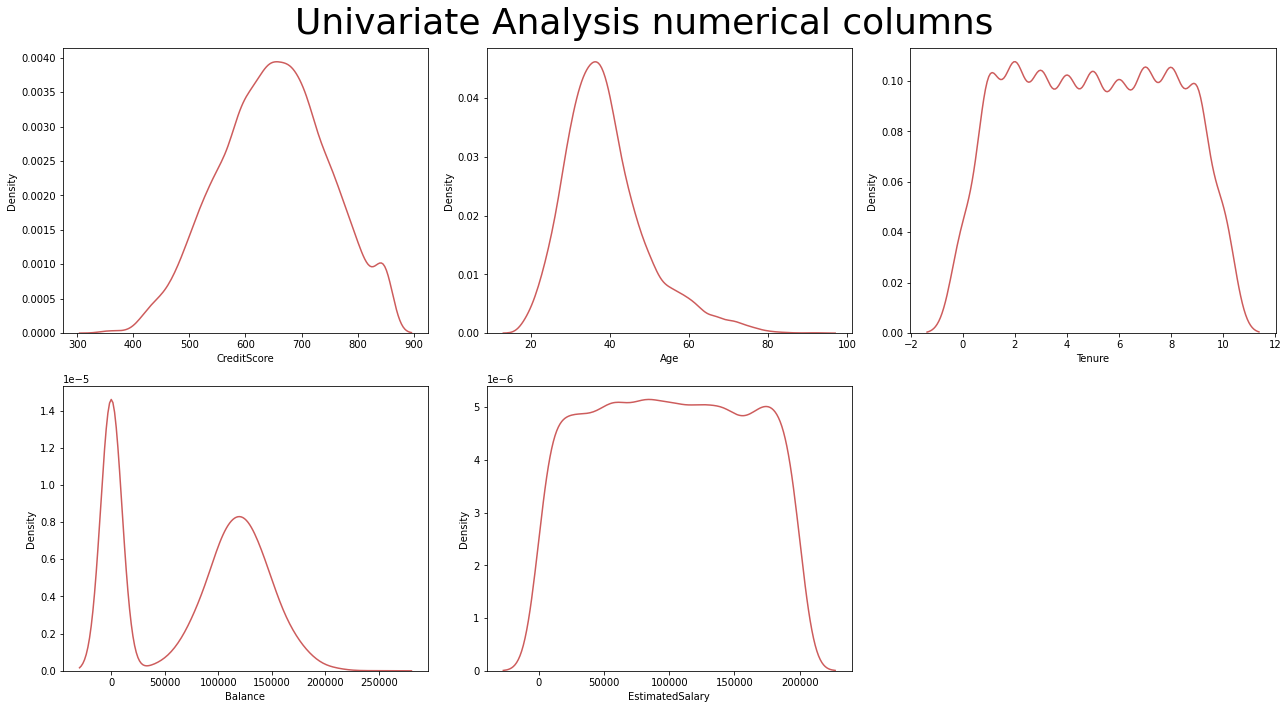

In [9]:
plt.figure(figsize=(18,10))
plt.suptitle('Univariate Analysis numerical columns',size =36)
for i in range(0,len(num_cols)-2):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=df[num_cols[i+2]], color='indianred')
    plt.xlabel(num_cols[i+2])
    plt.tight_layout()

# save plot
plt.savefig('fig/univariate_analysis_num.png')

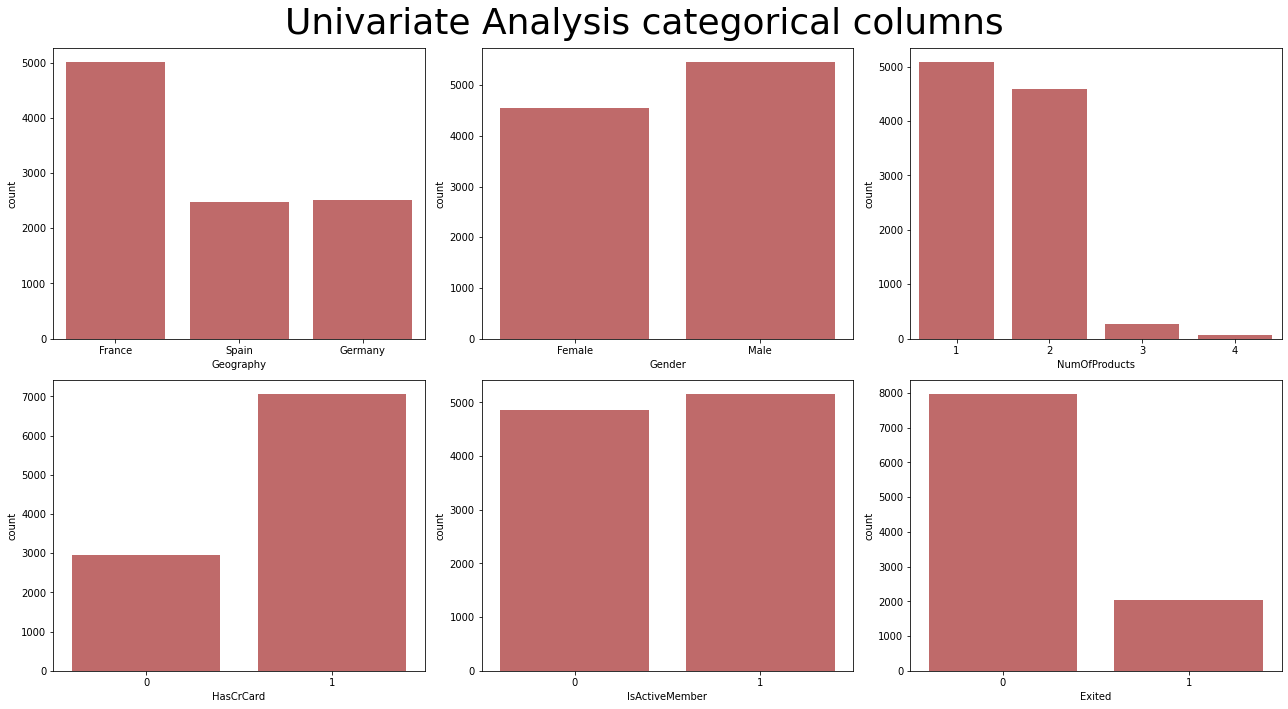

In [10]:
plt.figure(figsize=(18,10))
plt.suptitle('Univariate Analysis categorical columns',size =36)
for i in range(0,len(cat_cols)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=df[cat_cols[i]], color='indianred')
    plt.xlabel(cat_cols[i])
    plt.tight_layout()

# save plot
plt.savefig('fig/univariate_analysis_cat.png')

Dari visualisasi diatas disimpulakan bahwa:
- Kolom `CreditScore` memiliki distribusi normal
- Kolom `Age` memiliki distribusi sedikit skewness ke kanan
- Kolom `Balance` memiliki distribusi yang memiliki 2 modus
- Kolom `NumOfProduct` memiliki jumlah value 3 dan 4 yang sangat sedikit bisa kita gabung menjadi produk 1 dan lebih dari 1
- Kolom `Exited` sebagai label terdapat imbalance antara data churn dan no churn

## Bivariate analysis

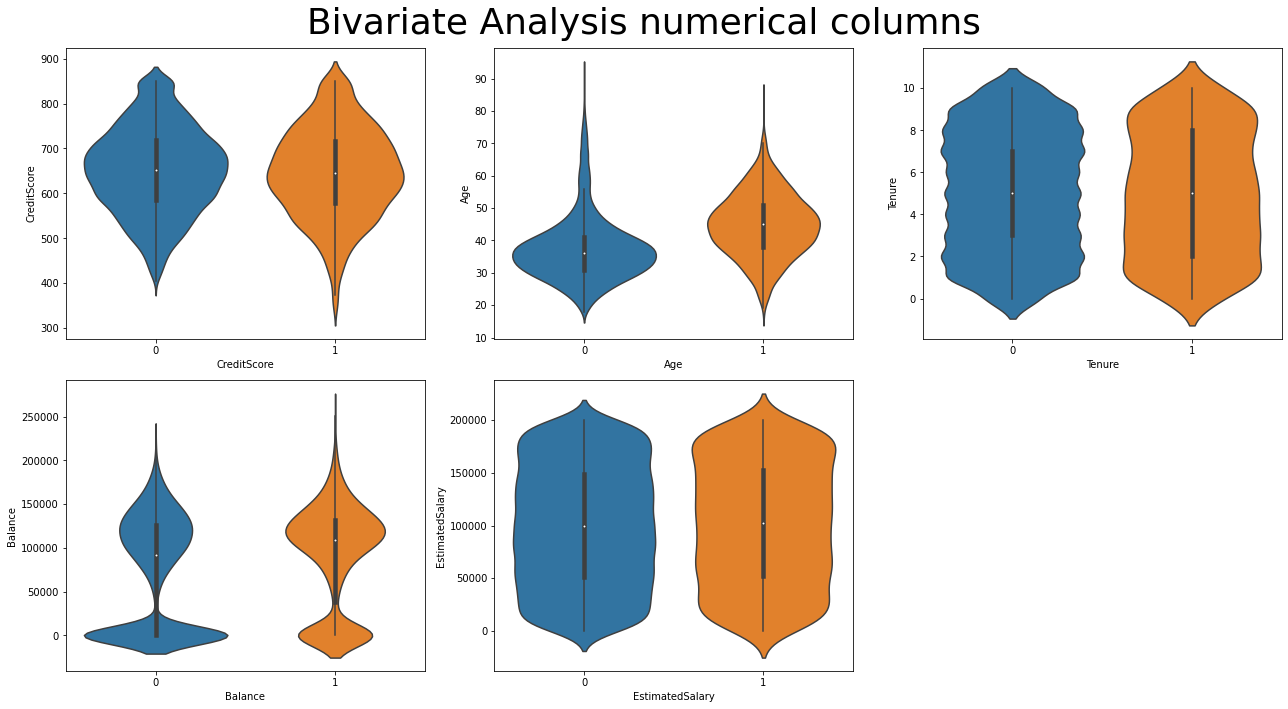

In [11]:
num_cols=['CreditScore','Age','Tenure','Balance','EstimatedSalary']

plt.figure(figsize=(18,10))
plt.suptitle('Bivariate Analysis numerical columns',size =36)
for i in range(0,len(num_cols)):
    plt.subplot(2,3,i+1)
    sns.violinplot(y=df[num_cols[i]],x=df.Exited)
    plt.xlabel(num_cols[i])
    plt.tight_layout()

# save plot
plt.savefig('fig/bivariate_analysis_num.png')

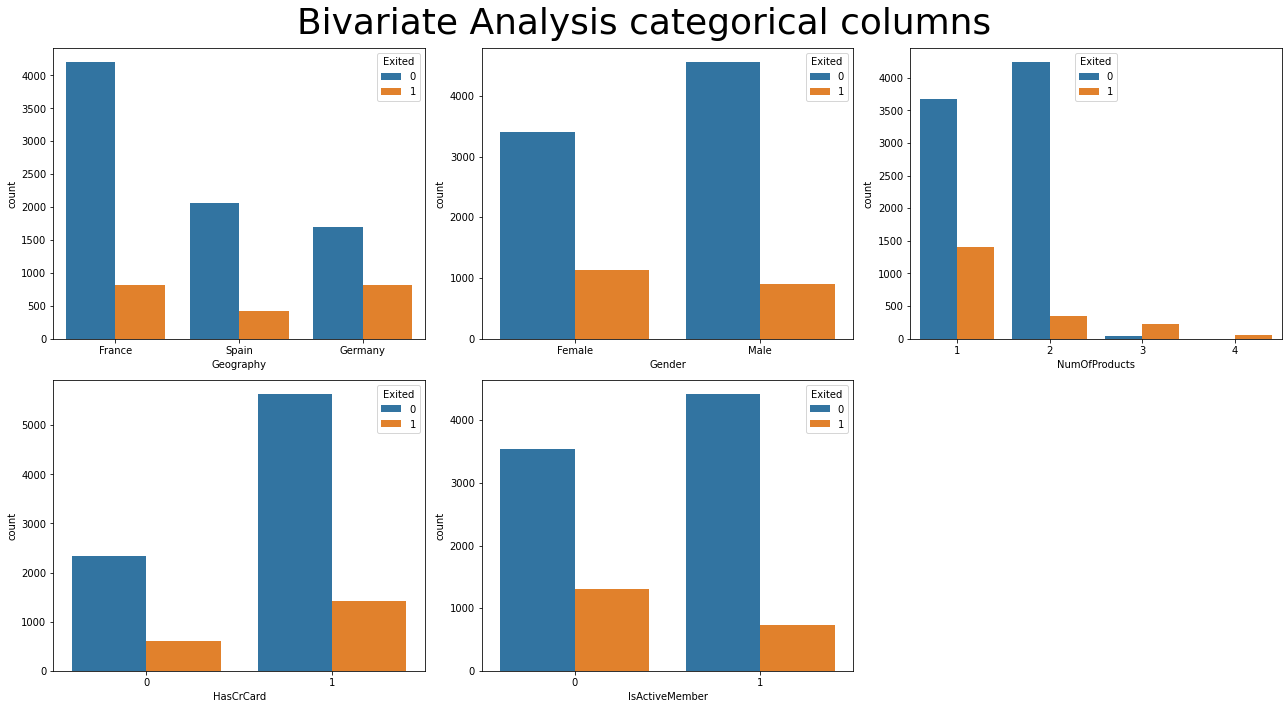

In [12]:
cat_cols2 = ['Geography','Gender','NumOfProducts','HasCrCard',
        'IsActiveMember']

plt.figure(figsize=(18,10))
plt.suptitle('Bivariate Analysis categorical columns',size =36)
for i in range(0,len(cat_cols2)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=df[cat_cols2[i]],hue=df.Exited)
    plt.xlabel(cat_cols2[i])
    plt.tight_layout()

# save plot
plt.savefig('fig/bivariate_analysis_cat.png')

Dari visualisasi diatas disimpulkan bahwa:
- Kolom `Age` pelanggan yang churn memiliki rata2 umur yang lebih tua daripada yang pelanggan yang tidak churn
- Kolom `Geography` pelanggan yang churn secara prosentase tertinggi di negara Germany
- Kolom `NumOfProduct`  pelanggan yang churn secara prosentase tertinggi pada jumlah produk 3 dan 4


## Multivariate analysis

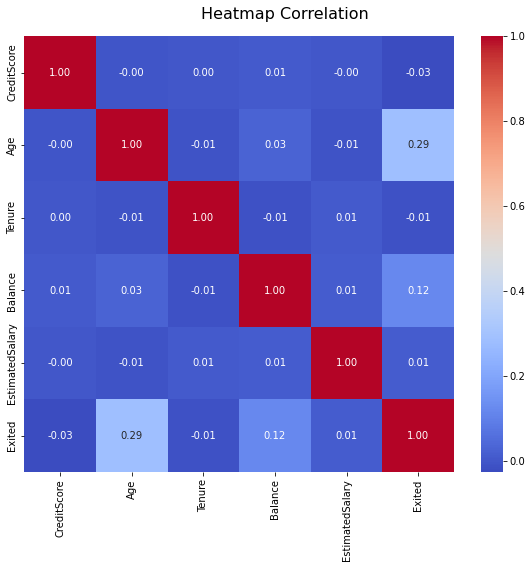

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df[num_cols+['Exited']].corr(),annot=True,fmt='.2f',cmap="coolwarm")
plt.suptitle('Heatmap Correlation', fontsize=16)
plt.tight_layout()
plt.savefig('fig/heatmap.png')

   Dari Heatmap diatas disimpukan bahwa tidak ada korelasi kuat antara numeric feature, dan feature age memiliki korelasi paling tinggi terhadap label yaitu 0.29

# Data Preprocessing

In [14]:
# copy dataframe
df_prep = df.copy()
df_prep.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
# Drop fiture Customerid dan Surname
df_prep = df[['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]

df_prep = df_prep[df_prep.NumOfProducts<=2]

In [16]:
#handling outlier
print(f'Jumlah baris sebelum outlier dihapus : {df_prep.shape[0]} baris')

q1 = np.percentile(df_prep['Age'],25)
q3 = np.percentile(df_prep['Age'],75)
iqr = q3 - q1
batasatas = q3+(1.5*iqr)
batasbawah = q1-(1.5*iqr)
df_outlier = df_prep[(df.Age< batasatas)&(df.Age> batasbawah)] 

print(f'Jumlah baris setelah outlier dihapus : {df_outlier.shape[0]} baris')

Jumlah baris sebelum outlier dihapus : 9674 baris
Jumlah baris setelah outlier dihapus : 9280 baris


In [17]:
#Label Encoding feature Gender
gender = {'Female':0,'Male':1}
df_outlier['Gender'] = df_outlier['Gender'].map(gender)

In [18]:
df_outlier = df_outlier.merge(pd.get_dummies(df_outlier['Geography'],drop_first= True),left_index= True,right_index=True)
df_encoding = df_outlier.drop('Geography',axis=1)
df_encoding.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
RowNumber,,,,,,,,,,,,
1,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
2,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
4,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
5,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
6,645,1,44,8,113755.78,2,1,0,149756.71,1,0,1


## Split train and test set

In [19]:
X = df_encoding.drop('Exited',axis=1)
y=df_encoding.Exited

In [20]:
# splitting into data train and test (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print(f'Jumlah data latih  terdiri dari {len(X_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

print(f'Jumlah data uji terdiri dari {len(X_test)} baris')
print(f'Jumlah class 0 : {sum(y_test==0)}')
print(f'Jumlah class 1 : {sum(y_test==1)}\n')

Jumlah data latih  terdiri dari 7424 baris
Jumlah class 0 : 6083
Jumlah class 1 : 1341

Jumlah data uji terdiri dari 1856 baris
Jumlah class 0 : 1521
Jumlah class 1 : 335



## Feature Transformation

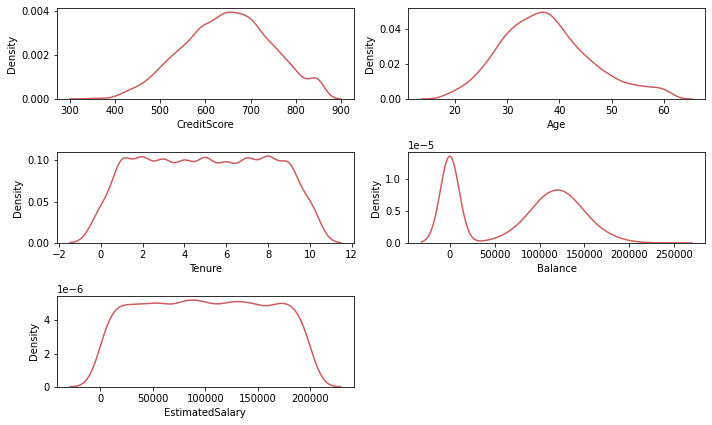

In [21]:
# distribution of data before scaling
plt.figure(figsize=(10, 6))
for i, col in enumerate(['CreditScore','Age','Tenure','Balance','EstimatedSalary']):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=X_train[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [22]:
#Standard Scaling
Standard = StandardScaler()
Standard.fit(X_train['CreditScore'].values.reshape(-1, 1))
X_train['CreditScore'] = Standard.transform(X_train['CreditScore'].values.reshape(-1, 1))
X_test['CreditScore'] = Standard.transform(X_test['CreditScore'].values.reshape(-1, 1))

Standard = StandardScaler()
Standard.fit(X_train['Age'].values.reshape(-1, 1))
X_train['Age'] = Standard.transform(X_train['Age'].values.reshape(-1, 1))
X_test['Age'] = Standard.transform(X_test['Age'].values.reshape(-1, 1))

Standard = StandardScaler()
Standard.fit(X_train['Tenure'].values.reshape(-1, 1))
X_train['Tenure'] = Standard.transform(X_train['Tenure'].values.reshape(-1, 1))
X_test['Tenure'] = Standard.transform(X_test['Tenure'].values.reshape(-1, 1))

Standard = StandardScaler()
Standard.fit(X_train['EstimatedSalary'].values.reshape(-1, 1))
X_train['EstimatedSalary'] = Standard.transform(X_train['EstimatedSalary'].values.reshape(-1, 1))
X_test['EstimatedSalary'] = Standard.transform(X_test['EstimatedSalary'].values.reshape(-1, 1))

Standard = StandardScaler()
Standard.fit(X_train['Balance'].values.reshape(-1, 1))
X_train['Balance'] = Standard.transform(X_train['Balance'].values.reshape(-1, 1))
X_test['Balance'] = Standard.transform(X_test['Balance'].values.reshape(-1, 1))


In [23]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain
RowNumber,,,,,,,,,,,
5260,-0.700832,1,1.678568,-1.040268,1.191658,1,0,1,-1.029274,0,0
7525,0.107811,0,0.284851,1.024416,1.443877,1,1,1,1.484981,0,0
1033,1.870240,1,0.284851,-0.352040,-1.237919,2,0,1,-0.319441,0,1
2175,-0.037330,1,-1.341153,-0.352040,1.005424,1,1,0,1.128388,0,0
2632,-0.213573,1,-0.295865,-1.384382,1.523913,1,1,1,1.042660,0,0
...,...,...,...,...,...,...,...,...,...,...,...
788,0.667641,1,0.517137,-1.040268,1.611654,1,0,1,-0.919948,1,0
2024,-0.503855,1,0.400994,-1.384382,0.750736,1,0,1,1.269883,0,0
3346,0.087077,0,-0.760437,0.680302,0.750797,1,1,0,0.038382,0,0


### Handling imbalance data

In [24]:
print(f'Jumlah data uji sebelum SMOTE terdiri dari {len(X_train)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

smote = SMOTE(1,random_state=42)
X_train,y_train = smote.fit_resample(X_train,y_train)

print(f'Jumlah data uji setelah SMOTE terdiri dari {len(X_test)} baris')
print(f'Jumlah class 0 : {sum(y_train==0)}')
print(f'Jumlah class 1 : {sum(y_train==1)}\n')

Jumlah data uji sebelum SMOTE terdiri dari 7424 baris
Jumlah class 0 : 6083
Jumlah class 1 : 1341

Jumlah data uji setelah SMOTE terdiri dari 1856 baris
Jumlah class 0 : 6083
Jumlah class 1 : 6083



# Machine Learning Modelling & Evaluation

## Model Selection


In [25]:
def plotting_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1, 1, figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Greens', annot_kws={"fontsize":12}, ax=ax)

    # setting title and axis labels
    plt.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('Predicted Labels', fontsize=12)
    ax.set_ylabel('True Labels', fontsize=12)
    ax.set_title('Confusion Matrix ' + title, fontsize=14)
    ax.xaxis.set_ticklabels(['Not Taken', 'Taken'])
    ax.yaxis.set_ticklabels(['Not Taken', 'Taken'])
    plt.show()
    
    print(f'Dari model {title} didapatkan bahwa:')
    print(f'- Jumlah TP (True Positive) = {cm[1][1]}')
    print(f'- Jumlah TN (True Negative) = {cm[0][0]}')
    print(f'- Jumlah FP (False Positive) = {cm[0][1]}')
    print(f'- Jumlah FN (False Negative) = {cm[1][0]}')

### 1. Logistic Regression

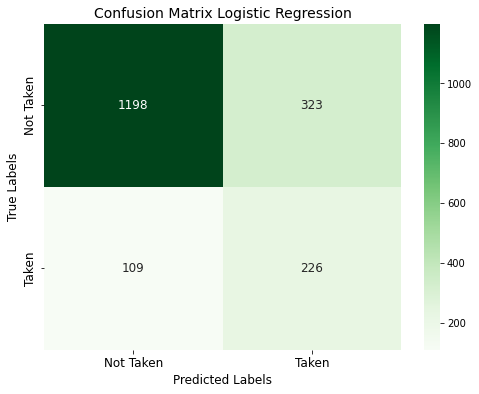

Dari model Logistic Regression didapatkan bahwa:
- Jumlah TP (True Positive) = 226
- Jumlah TN (True Negative) = 1198
- Jumlah FP (False Positive) = 323
- Jumlah FN (False Negative) = 109


In [26]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

plotting_confusion_matrix(model_lr, X_test, y_test, title='Logistic Regression')

### 2. Decision Tree

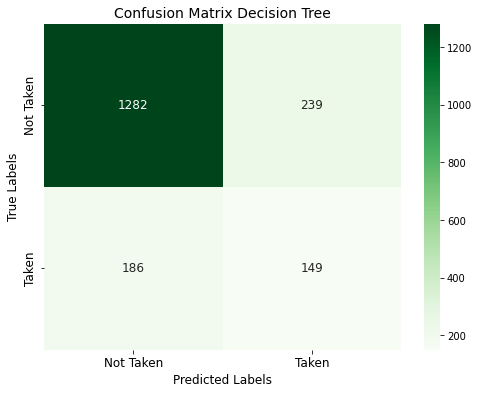

Dari model Decision Tree didapatkan bahwa:
- Jumlah TP (True Positive) = 149
- Jumlah TN (True Negative) = 1282
- Jumlah FP (False Positive) = 239
- Jumlah FN (False Negative) = 186


In [27]:
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

plotting_confusion_matrix(model_dt, X_test, y_test, title='Decision Tree')

### 3. Random Forest

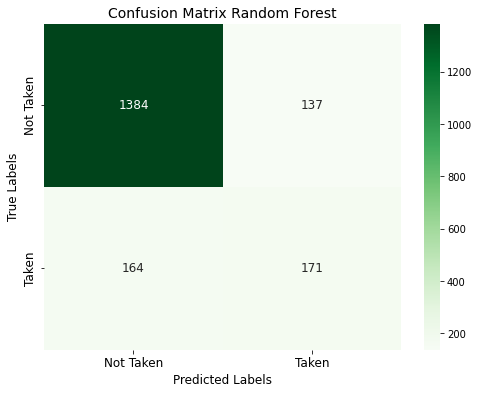

Dari model Random Forest didapatkan bahwa:
- Jumlah TP (True Positive) = 171
- Jumlah TN (True Negative) = 1384
- Jumlah FP (False Positive) = 137
- Jumlah FN (False Negative) = 164


In [28]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

plotting_confusion_matrix(model_rf, X_test, y_test, title='Random Forest')

### 4. AdaBoost

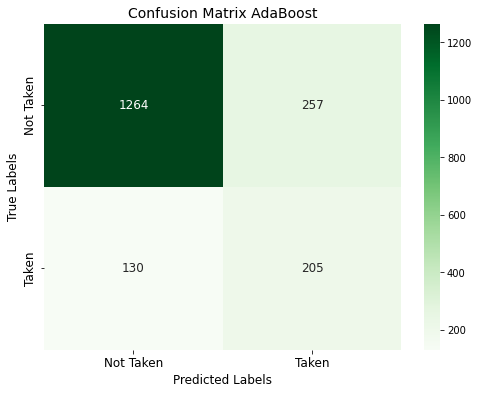

Dari model AdaBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 205
- Jumlah TN (True Negative) = 1264
- Jumlah FP (False Positive) = 257
- Jumlah FN (False Negative) = 130


In [29]:
model_adb = AdaBoostClassifier(random_state=42)
model_adb.fit(X_train, y_train)

plotting_confusion_matrix(model_adb, X_test, y_test, title='AdaBoost')

### 5. XGBoost

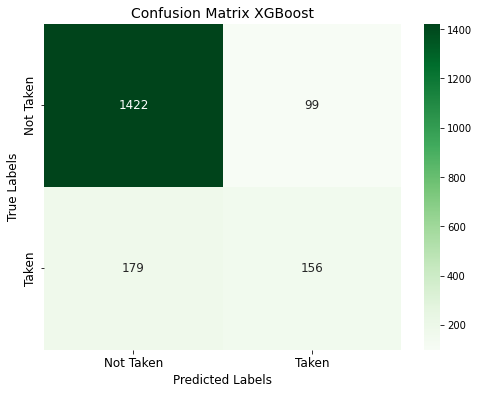

Dari model XGBoost didapatkan bahwa:
- Jumlah TP (True Positive) = 156
- Jumlah TN (True Negative) = 1422
- Jumlah FP (False Positive) = 99
- Jumlah FN (False Negative) = 179


In [30]:
model_xgb = XGBClassifier(verbosity=0, random_state=42)
model_xgb.fit(X_train, y_train)

plotting_confusion_matrix(model_xgb, X_test, y_test, title='XGBoost')

## Model Evaluation


Pada kasus kita bertujuan untuk memprediksi apakah pelanggan cenderung churn berdasarkan data yang tersedia maka:
- Metric evaluasi yang akan kita fokuskan adalah **Accuracy** dimana kita ingin mempertimbangkan ketepatan dalam memprediksi.

In [31]:
def eval_classification(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    precision = round(precision_score(y_test, y_pred,average=None)[0], 4)
    recall = round(recall_score(y_test, y_pred), 4)
    f1 = round(f1_score(y_test, y_pred), 4)
    mcc = round(matthews_corrcoef(y_test, y_pred), 4)
    auc_test = round(roc_auc_score(y_test, y_pred_proba[:, 1]), 4)
    auc_train = round(roc_auc_score(y_train, y_pred_proba_train[:, 1]), 4)   
    
    return accuracy, precision, recall, f1, mcc, auc_test, auc_train

def score_all_classification(model_list, X_train, y_train, X_test, y_test):
    model_name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost']
    eval_cols = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC', 'AUC (Test)', 'AUC (Train)']
    
    eval_list = []
    for name, model in zip(model_name, model_list):
        result = eval_classification(model, X_train, y_train, X_test, y_test)
        eval_list.append([name] + list(result))
    df_model = pd.DataFrame(data=eval_list, columns=eval_cols)
    
    return df_model

In [32]:
# scoring base model
model_list_base = [model_lr, model_dt, model_rf, model_adb, model_xgb]
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.7672,0.9166,0.6746,0.5113,0.3895,0.8165,0.8687
1,Decision Tree,0.7710,0.8733,0.4448,0.4122,0.2721,0.6438,1.0000
2,Random Forest,0.8378,0.8941,0.5104,0.5319,0.4346,0.8203,1.0000
3,AdaBoost,0.7915,0.9067,0.6119,0.5144,0.3940,0.8162,0.9006
4,XGBoost,0.8502,0.8882,0.4657,0.5288,0.4475,0.8254,0.9959


Dari hasil evaluasi kelima model tersebut didapatkan bahwa:
- **Model Logistic Regression** mampu menghasilkan Accuracy cukup  yaitu 80.68%.
- **Model Decision Tree** mampu mneghasilkan Accuracy cukup tinggi yaitu 86.48%.
- **Model Random Forest** mampu menghasilkan Accuracy sangat tinggi yaitu 91.87%.
- **Model AdaBoost** mampu menghasilkan Accuracy cukup tinggi yaitu 81.31%.
- **Model XGBoost** mampu menghasilkan Accuracy yang cukup tinggi yaitu 90.60%.

Maka dapat disimpulkan dari kelima model yang dipilih,sementara **Model Random Forest** merupakan base model terbaik, namun kita masih harus melakukan tuning lanjutan agar tidak terjadi overfitting.

## Hyperparameter Tuning

In [33]:
list_hyperparameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': [float(x) for x in np.logspace(-3, 3, 20)]
    },
    { # Decision Tree
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'max_features' : ['auto', 'sqrt']
    }, 
    { # Random Forest
        'n_estimators' : [int(x) for x in np.linspace(50, 1000, 50)], 
        'max_features' : ['auto', 'sqrt', 'log2'],
        'max_depth' : [int(x) for x in np.linspace(10, 100, 10)],
        'criterion' : ['gini','entropy'],
        'min_samples_split' : [int(x) for x in np.linspace(2, 10, 5)],
        'min_samples_leaf' : [int(x) for x in np.linspace(1, 10, 5)],
        'class_weight' : ['balanced', 'balanced_subsample'],
        'oob_score' : [True, False]
    },
    { # Adaboost
       'n_estimators' : [int(x) for x in np.linspace(100, 2000, 1000)],
       'learning_rate' : [float(x) for x in np.linspace(0.001, 0.1, 100)],
       'algorithm' : ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 50, 10)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 10, 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],
        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, 11)],
        'learning_rate' : [float(x) for x in np.linspace(0, 1, 100)],
        'reg_lambda' : [float(x) for x in np.linspace(0, 1, 11)],
        'reg_alpha' : [float(x) for x in np.linspace(0, 1, 11)]
    }
]

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.best_estimator_.get_params()[key])
        
def eval_after_hyperparameter_tuning(model, X_train, y_train, X_test, y_test):
    eval_new = eval_classification(model, X_train, y_train, X_test, y_test)
    eval_score = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC (Test)', 'AUC (Train)']
    for score, e in zip(eval_score, eval_new):
        print(score + ': ' + str(e))

### 1. Logistic Regression

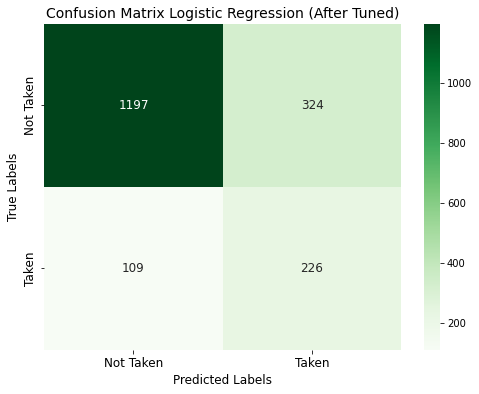

Dari model Logistic Regression (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 226
- Jumlah TN (True Negative) = 1197
- Jumlah FP (False Positive) = 324
- Jumlah FN (False Negative) = 109


In [34]:
model_lr = LogisticRegression(random_state=42)
tuned_lr = RandomizedSearchCV(model_lr, list_hyperparameters[0], cv=5, scoring='accuracy', random_state=42)
tuned_lr.fit(X_train, y_train)

plotting_confusion_matrix(tuned_lr, X_test, y_test, title='Logistic Regression (After Tuned)')

In [35]:
print('MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING')
print('=====================================================')
show_best_hyperparameter(tuned_lr, list_hyperparameters[0])
print('=====================================================')
eval_after_hyperparameter_tuning(tuned_lr, X_train, y_train, X_test, y_test)

MODEL LOGISTIC REGRESSION AFTER HYPERPARAMETER TUNING
Best penalty: l2
Best C: 54.555947811685144
Accuracy: 0.7667
Precision: 0.9165
Recall: 0.6746
F1 Score: 0.5107
AUC (Test): 0.3888
AUC (Train): 0.8165


### 2. Decision Tree

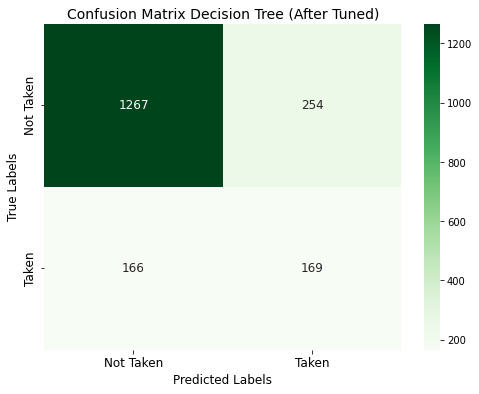

Dari model Decision Tree (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 169
- Jumlah TN (True Negative) = 1267
- Jumlah FP (False Positive) = 254
- Jumlah FN (False Negative) = 166


In [36]:
model_dt = DecisionTreeClassifier(random_state=42)
tuned_dt = RandomizedSearchCV(model_dt, list_hyperparameters[1], cv=5, scoring='accuracy', random_state=42)
tuned_dt.fit(X_train, y_train)

plotting_confusion_matrix(tuned_dt, X_test, y_test, title='Decision Tree (After Tuned)')

In [37]:
print('MODEL DECISION TREE AFTER HYPERPARAMETER TUNING')
print('===============================================')
show_best_hyperparameter(tuned_dt, list_hyperparameters[1])
print('===============================================')
eval_after_hyperparameter_tuning(tuned_dt, X_train, y_train, X_test, y_test)

MODEL DECISION TREE AFTER HYPERPARAMETER TUNING
Best max_depth: 100
Best min_samples_split: 2
Best min_samples_leaf: 1
Best max_features: auto
Accuracy: 0.7737
Precision: 0.8842
Recall: 0.5045
F1 Score: 0.4459
AUC (Test): 0.3094
AUC (Train): 0.6687


### 3. Random Forest

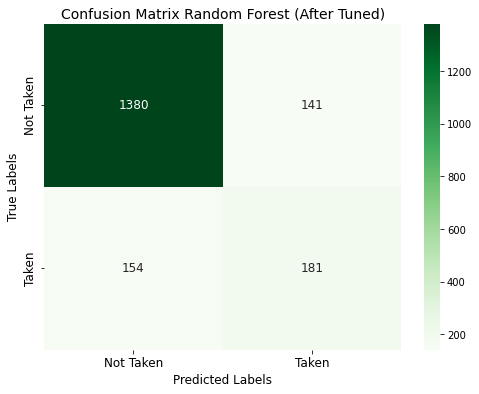

Dari model Random Forest (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 181
- Jumlah TN (True Negative) = 1380
- Jumlah FP (False Positive) = 141
- Jumlah FN (False Negative) = 154


In [38]:
model_rf = RandomForestClassifier(random_state=42)
tuned_rf = RandomizedSearchCV(model_rf, list_hyperparameters[2], cv=5, scoring='accuracy', random_state=42)
tuned_rf.fit(X_train, y_train)

plotting_confusion_matrix(tuned_rf, X_test, y_test, title='Random Forest (After Tuned)')

In [39]:
print('MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING')
print('===============================================')
show_best_hyperparameter(tuned_rf, list_hyperparameters[2])
print('===============================================')
eval_after_hyperparameter_tuning(tuned_rf, X_train, y_train, X_test, y_test)

MODEL RANDOM FOREST AFTER HYPERPARAMETER TUNING
Best n_estimators: 709
Best max_features: log2
Best max_depth: 50
Best criterion: entropy
Best min_samples_split: 6
Best min_samples_leaf: 1
Best class_weight: balanced
Best oob_score: True
Accuracy: 0.8411
Precision: 0.8996
Recall: 0.5403
F1 Score: 0.551
AUC (Test): 0.4546
AUC (Train): 0.8262


### 4. AdaBoost

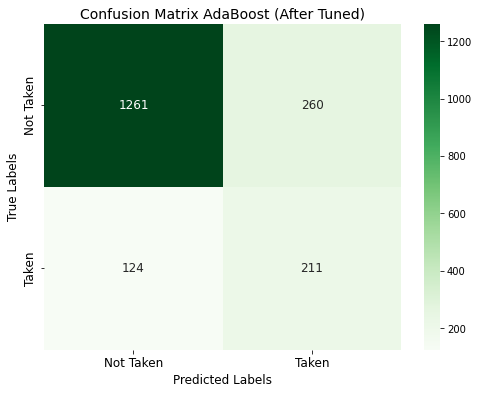

Dari model AdaBoost (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 211
- Jumlah TN (True Negative) = 1261
- Jumlah FP (False Positive) = 260
- Jumlah FN (False Negative) = 124


In [40]:
model_adb = AdaBoostClassifier(random_state=42)
tuned_adb = RandomizedSearchCV(model_adb, list_hyperparameters[3], cv=5, scoring='accuracy', random_state=42)
tuned_adb.fit(X_train, y_train)

plotting_confusion_matrix(tuned_adb, X_test, y_test, title='AdaBoost (After Tuned)')

In [41]:
print('MODEL ADABOOST AFTER HYPERPARAMETER TUNING')
print('==========================================')
show_best_hyperparameter(tuned_adb, list_hyperparameters[3])
print('==========================================')
eval_after_hyperparameter_tuning(tuned_adb, X_train, y_train, X_test, y_test)

MODEL ADABOOST AFTER HYPERPARAMETER TUNING
Best n_estimators: 1748
Best learning_rate: 0.047
Best algorithm: SAMME.R
Accuracy: 0.7931
Precision: 0.9105
Recall: 0.6299
F1 Score: 0.5236
AUC (Test): 0.4056
AUC (Train): 0.8193


### 5. XGBoost

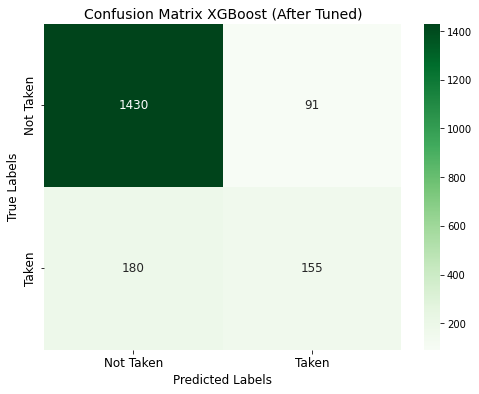

Dari model XGBoost (After Tuned) didapatkan bahwa:
- Jumlah TP (True Positive) = 155
- Jumlah TN (True Negative) = 1430
- Jumlah FP (False Positive) = 91
- Jumlah FN (False Negative) = 180


In [42]:
model_xgb = XGBClassifier(random_state=42, verbosity=0)
tuned_xgb = RandomizedSearchCV(model_xgb, list_hyperparameters[-1], cv=5, scoring='accuracy', random_state=42)
tuned_xgb.fit(X_train, y_train)

plotting_confusion_matrix(tuned_xgb, X_test, y_test, title='XGBoost (After Tuned)')

In [43]:
print('MODEL XGBOOST AFTER HYPERPARAMETER TUNING')
print('=========================================')
show_best_hyperparameter(tuned_xgb, list_hyperparameters[-1])
print('=========================================')
eval_after_hyperparameter_tuning(tuned_xgb, X_train, y_train, X_test, y_test)

MODEL XGBOOST AFTER HYPERPARAMETER TUNING
Best max_depth: 10
Best min_child_weight: 8
Best gamma: 0.1
Best tree_method: auto
Best colsample_bytree: 0.7000000000000001
Best learning_rate: 0.13131313131313133
Best reg_lambda: 0.5
Best reg_alpha: 0.6000000000000001
Accuracy: 0.854
Precision: 0.8882
Recall: 0.4627
F1 Score: 0.5336
AUC (Test): 0.4569
AUC (Train): 0.8249


In [44]:
# base model
score_all_classification(model_list_base, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.7672,0.9166,0.6746,0.5113,0.3895,0.8165,0.8687
1,Decision Tree,0.7710,0.8733,0.4448,0.4122,0.2721,0.6438,1.0000
2,Random Forest,0.8378,0.8941,0.5104,0.5319,0.4346,0.8203,1.0000
3,AdaBoost,0.7915,0.9067,0.6119,0.5144,0.3940,0.8162,0.9006
4,XGBoost,0.8502,0.8882,0.4657,0.5288,0.4475,0.8254,0.9959


In [45]:
# tuned model
model_list_tuned = [tuned_lr, tuned_dt, tuned_rf, tuned_adb, tuned_xgb]
score_all_classification(model_list_tuned, X_train, y_train, X_test, y_test)

,Model,Accuracy,Precision,Recall,F1 Score,MCC,AUC (Test),AUC (Train)
0,Logistic Regression,0.7667,0.9165,0.6746,0.5107,0.3888,0.8165,0.8687
1,Decision Tree,0.7737,0.8842,0.5045,0.4459,0.3094,0.6687,1.0000
2,Random Forest,0.8411,0.8996,0.5403,0.5510,0.4546,0.8262,0.9998
3,AdaBoost,0.7931,0.9105,0.6299,0.5236,0.4056,0.8193,0.9038
4,XGBoost,0.8540,0.8882,0.4627,0.5336,0.4569,0.8249,0.9932


In [46]:
#Check Overfitting and Underfitting
def checkoverfit(model,x_train,x_test,title):
    cek = pd.DataFrame({
        'Model': title,
        'accuracy_score_train':[accuracy_score(y_train,model.predict(x_train))],
        'accuracy_score_test' :[accuracy_score(y_test,model.predict(x_test))],
        'accuracy_score_cv' : [model.best_score_]
        })
    return cek
checkoverfit(tuned_xgb,X_train,X_test,'XGBoost Classifier')

,Model,accuracy_score_train,accuracy_score_test,accuracy_score_cv
0,XGBoost Classifier,0.959231,0.853987,0.890121


Dari hasil evaluasi tersebut dapat disimpulkan bahwa:
- **Model Logistic Regression** menghasilkan Accuracy 76.67% dimana hasilnya sama dengan sebelum dituning hyperparameternya.
- **Model Decision Tree** menghasilkan Accuracy 77.37% dimana hasilnya sama dengan sebelum dituning hyperparameternya.
- **Model Random Forest** menghasilkan Accuracy 84.11% dimana hasilnya sama dengan sebelum dituning hyperparameternya.
- **Model AdaBoost** menghasilkan Accuracy 79.31% dimana hasilnya sama dengan sebelum dituning hyperparameternya.
- **Model XGBoost** menghasilkan F1 Score 85.40% dimana hasilnya sama dengan sebelum dituning hyperparameternya.

Dari hasil kelima model tersebut, maka dapat disimpulkan model **XGBoost** tetap menjadi model yang terbaik dengan Accuracy paling tinggi yaitu **85.40%** dan hasil scoring metric yang lain juga lebih unggul dengan hyperparameter tuning yang telah dilakukan dan tidak overfit.

In [55]:
X_train.columns.tolist()

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Germany',
 'Spain']

In [ ]:
['CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Germany, Spain']

# Modelling Conclusion

1. Dari serangkaian modelling yang telah dilakukan, model dengan feature selection berdasarkan feature importance memberikan hasil yang lebih bagus dimana 11 fitur tersebut antara lain **'CreditScore, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Germany, Spain'**.

2. Model yang memberikan hasil terbaik yaitu model **XGBoost dengan Accuracy 85.40% dan presisi 88.82%** dimana telah dilakukan hyperparameter tuning dengan mempertimbangkan nilai metric yang lain. Model ini nantinya akan digunakan untuk menganalisis fitur-fitur yang lebih mendominasi untuk dijadikan insight dan hasil prediksi model akan digunakan sebagai acuan bisnis kami.

# Insights and Recommendation

# Modelling Insights

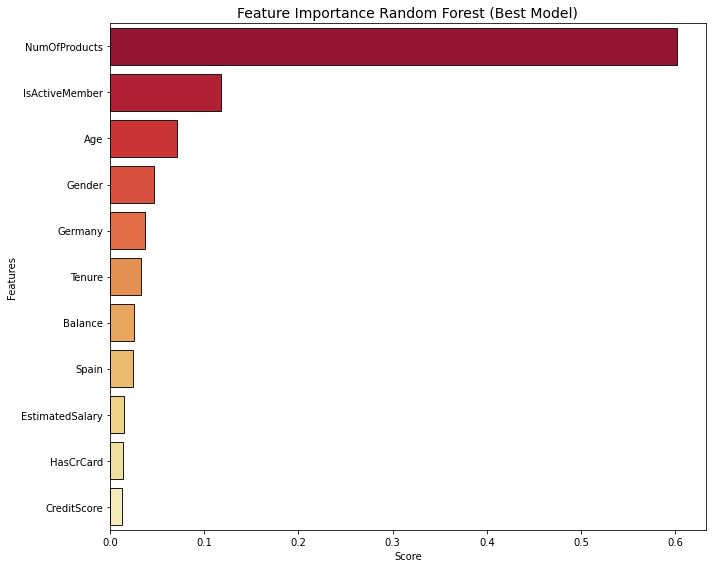

In [47]:
# feature importance using best model
feature_importance_rf = pd.Series(tuned_xgb.best_estimator_.feature_importances_, index=X_train.columns)
df_feature = feature_importance_rf.sort_values(ascending=False).to_frame(name='Score').reset_index()

plt.figure(figsize=(10,8))
sns.barplot(data=df_feature, y='index', x='Score', palette='YlOrRd_r', edgecolor='.1')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Importance Random Forest (Best Model)', fontsize=14)
plt.tight_layout()
plt.savefig('fig/feature_importance.png')
plt.show()

In [48]:
# combine prediction labels into test data
df_final_test = X_test.copy()
best_model = tuned_xgb.best_estimator_
df_final_test['ProdTaken'] = y_test
df_final_test['ProdTaken_Pred'] = best_model.predict(X_test)
df_final_test['ProdTaken_PredProba'] = best_model.predict_proba(X_test)[:,1]
df_final_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,ProdTaken,ProdTaken_Pred,ProdTaken_PredProba
RowNumber,,,,,,,,,,,,,,
1931,-1.177725,1,-1.689582,0.336188,0.243761,2,1,0,0.360943,1,0,0,0,0.052150
3711,-0.047697,1,-0.876580,-1.384382,0.779099,1,1,1,1.629362,0,0,0,0,0.056230
2145,-0.161737,1,-0.412008,-1.384382,-1.237919,2,1,0,-0.661504,0,1,0,0,0.010673
3214,1.839138,1,0.981710,-1.384382,1.702067,1,1,1,-1.507389,0,1,0,0,0.192828
4401,1.206737,0,-0.412008,0.336188,0.469433,1,0,1,0.663043,1,0,1,0,0.389209


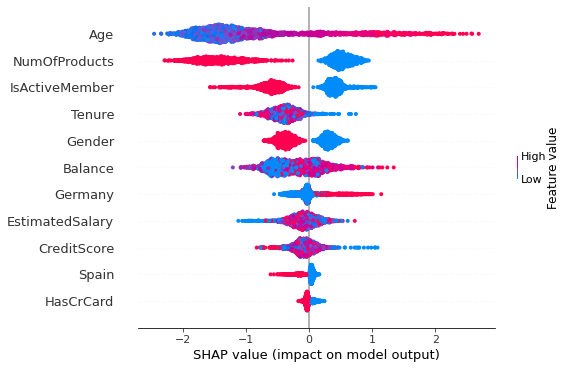

<Figure size 432x288 with 0 Axes>

In [49]:
explainer = shap.TreeExplainer(tuned_xgb.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
plt.savefig('fig/shap.png')

    Dari observasi SHAP diatas diketahui bahwa:
        1. jika berumur tinggi, Jumlah produk sedikit dan tidak aktif akan bernilai positif pada model (churn).
        2. credit score yang rendah dan tidak memiliki kartu kredit juga berpotensi churn

## Gain Lift Analysis

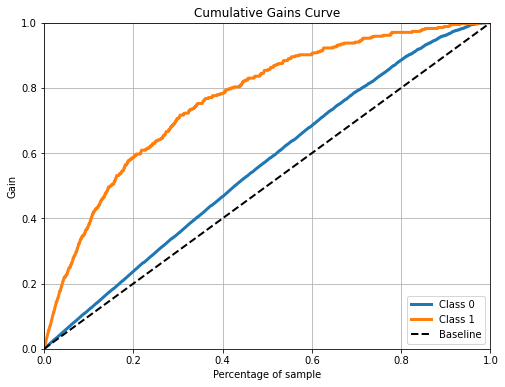

In [50]:
skplt.metrics.plot_cumulative_gain(df_final_test['ProdTaken'],tuned_xgb.predict_proba(X_test),figsize=(8,6))
plt.savefig('fig/gain.png')
plt.show()

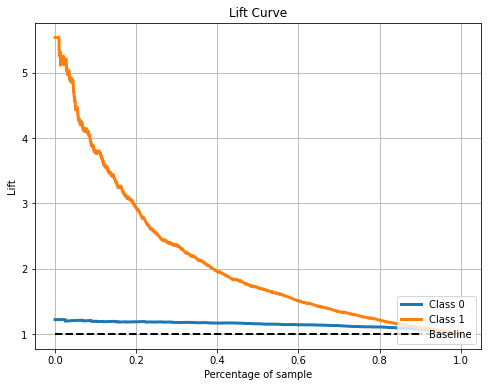

In [51]:
skplt.metrics.plot_lift_curve(df_final_test['ProdTaken'],tuned_xgb.predict_proba(X_test),figsize=(8,6))
plt.savefig('fig/lift.png')
plt.show()

    Diketahui dari tabel diatas jika menggunakan 20% dari tabel gain model ini dapat memprediksi 60% dari seluruh responds yang ada. Dan dari tabel lift kita bisa lihat jika menggunakan 20% dari data maka performancenya 4x lipat daripada nilai acaknya. bisa disimbulkan bahwa model ini sangat baik dalam memprediksi dan bukan hanya kebetulan saja.